In [420]:
import numpy as np
import pandas as pd
import random

In [421]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor , BayesianRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn import tree

from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

In [422]:
df = pd.read_csv('fuselage_dataset.csv')
print(df)

     a  b     c  aoa  re        cl        cd
0    1  1  0.25  -90  10 -0.105080  0.487330
1    1  1  0.25  -85  10 -0.146358  0.514457
2    1  1  0.25  -80  10 -0.192179  0.535143
3    1  1  0.25  -75  10 -0.239482  0.544505
4    1  1  0.25  -70  10 -0.286200  0.541827
..  .. ..   ...  ...  ..       ...       ...
349  3  1  1.00   65  50  0.410910  0.502557
350  3  1  1.00   70  50  0.402379  0.538003
351  3  1  1.00   75  50  0.397284  0.584518
352  3  1  1.00   80  50  0.380354  0.617568
353  3  1  1.00   85  50  0.328372  0.612561

[354 rows x 7 columns]


In [423]:
input_x = df[['a', 'b', 'c', 'aoa', 're']]
print(input_x)

     a  b     c  aoa  re
0    1  1  0.25  -90  10
1    1  1  0.25  -85  10
2    1  1  0.25  -80  10
3    1  1  0.25  -75  10
4    1  1  0.25  -70  10
..  .. ..   ...  ...  ..
349  3  1  1.00   65  50
350  3  1  1.00   70  50
351  3  1  1.00   75  50
352  3  1  1.00   80  50
353  3  1  1.00   85  50

[354 rows x 5 columns]


In [424]:
input_x = np.asarray(input_x)
print(input_x.shape)

(354, 5)


In [425]:
output_cl = df[['cl']]
output_cl = np.asarray(output_cl).reshape(-1)
print(output_cl.shape)

(354,)


In [426]:
output_cd = df[['cd']]
output_cd = np.asarray(output_cl).reshape(-1)
print(output_cd.shape)

(354,)


In [427]:
scaler = StandardScaler()
scaler.fit(input_x)
scaled_input_x = scaler.transform(input_x)

In [428]:
X_train, X_test, y_train, y_test = train_test_split(input_x, output_cd, test_size = 0.20, shuffle=True)
#X_train1 = input_x[:259]
#y_train1 = output_cl[:259]
#X_rem = input_x[259:]
#y_rem = output_cl[259:]



#X_train2, X_test, y_train2, y_test = train_test_split(X_rem, y_rem, test_size = 0.50, shuffle=True)
#X_train = np.concatenate((X_train1, X_train2), axis=0)
#y_train = np.concatenate((y_train1, y_train2), axis=0)


#print(X_test,y_test)


In [429]:
#regr = LinearRegression()
#regr = make_pipeline(StandardScaler(), BayesianRidge(max_iter=1000, tol=1e-3, penalty='elasticnet'))
#regr = SGDRegressor()
#regr = BayesianRidge(max_iter=1000)
#regr = tree.DecisionTreeRegressor()
regr = MLPRegressor(hidden_layer_sizes=(300,150,50),max_iter = 100000,activation = 'relu',solver = 'lbfgs', batch_size=32, learning_rate='adaptive')
 
regr.fit(X_train, y_train)

MLPRegressor(batch_size=32, hidden_layer_sizes=(300, 150, 50),
             learning_rate='adaptive', max_iter=100000, solver='lbfgs')

In [430]:
print(regr.score(X_test, y_test))

0.9139930275743546


In [431]:
print(regr.score(X_train, y_train))

0.9927193945023373


In [432]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [433]:
y_pred = regr.predict(X_test)
print(y_pred.shape)

(71,)


In [434]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.045619806780004796
MSE: 0.005241471328946911
RMSE: 0.07239800638793109


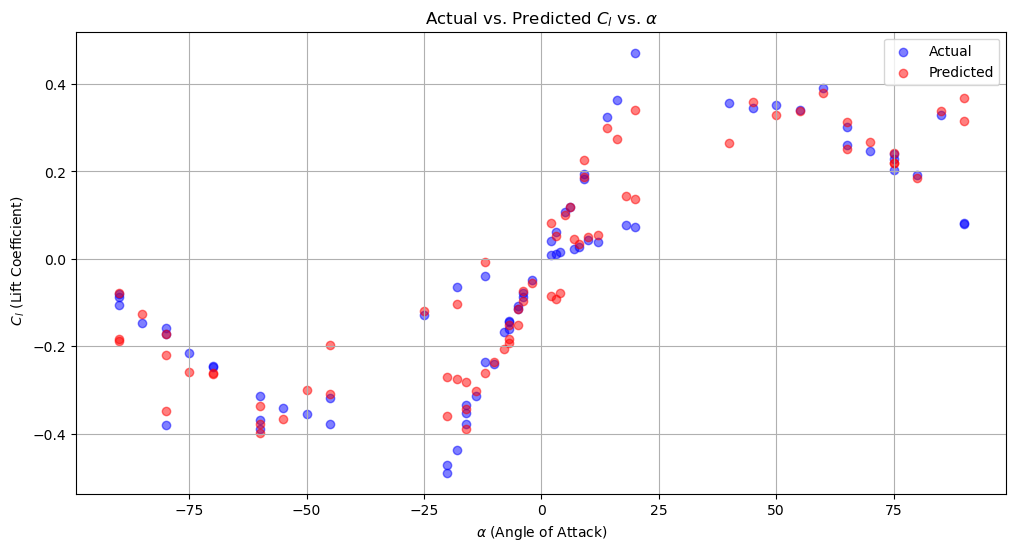

In [436]:
plt.figure(figsize=(12, 6)) 
plt.scatter(X_test[:,3], y_test, color='blue', label='Actual', alpha=0.5) 
plt.scatter(X_test[:,3], y_pred, color='red', label='Predicted', alpha=0.5) 
plt.title('Actual vs. Predicted $C_l$ vs. $\\alpha$') 
plt.xlabel('$\\alpha$ (Angle of Attack)') 
plt.ylabel(' $C_l$ (Lift Coefficient)')
plt.legend() 
plt.grid(True)
plt.show()

In [312]:
diff = y_pred - y_test
diff = np.asarray(diff).reshape(-1)
print(diff.shape)
diff = np.absolute(diff)
y_test = np.asarray(y_test).reshape(-1)
y_test = np.absolute(y_test)
pctg_error = (diff/y_test)*100
print(pctg_error)
print(np.mean(pctg_error))

(48,)
[1.91094996e+01 1.74047855e+01 1.80882289e+01 3.77082090e+04
 4.21392738e+01 1.80882289e+01 2.41350373e+01 4.57239561e+02
 3.71105991e+02 1.68570155e+01 4.08210665e+00 2.28323835e+01
 1.00780786e+01 7.78204228e+00 3.05337285e+01 1.61017040e+00
 6.99196868e+00 1.59976285e+01 2.37219069e+01 1.58302169e+01
 1.00780786e+01 1.48662039e+01 1.00617391e+01 1.10612288e+01
 2.50863956e+01 1.88997377e+01 1.58302169e+01 2.50863956e+01
 4.08210665e+00 1.06650482e+01 1.26621916e+00 1.48529172e+01
 1.67235764e+01 2.37219069e+01 1.45208855e+01 3.59303228e+01
 5.39802239e+00 5.33717550e+00 2.95880377e+01 1.58697281e+01
 2.76272937e+00 1.71916337e+01 2.64328974e+01 2.64759193e+00
 5.39802239e+00 3.71105991e+02 1.40464015e+01 1.06650482e+01]
824.8127722021803
